In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

#df = pd.read_csv("netflix_titles.csv")
#df = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/DataSets/netflix_titles.csv')
#df.head()

Reading from Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!ls "/content/drive/My Drive"
df = pd.read_csv('/content/drive/MyDrive/DataSets_Ameya/netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [ ]:
#getting an idea about the dimensions (columns) , their type and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#checking the number of null values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Checking the possible value of columns 
print(df['type'].unique())
#Checking the number of countries that are in the data.
print(df['country'].unique())
#By analysing the values we realise that the value of countries doesn't single values but rather gorup of values.

# for col in df:
#     print(col)
#     print(df[col].unique())

['TV Show' 'Movie']
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Iceland, United States' 'United Kingdom' 'Japan' 'South Korea'
 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland'
 'South Africa, Nigeria' 'France' 'United States, South Africa'
 'Portugal, Spain' 'Hong Kong, China, Singapore' 'United States, Germany'
 'South Africa, China, United States' 'Argentina'
 'United States, France, Serbia' 'Germany' 'Denmark, France, Poland'
 'Poland' 'Kenya' 'New Zealand, United Kingdom' 'Pakistan' 'Australia'
 'Australia, United States' 'Mexico, United States' 'United States, China'
 'China, Hong Kong' 'Taiwan' 'United States, United Kingdom'
 'France, South Korea, Japan' 'United States, Canada'
 'United Kingdom, United States' 'Netherlands, Denmark, South Africa'
 'Canada, United States' 'Denmark' 'Hong Kong'
 'France, Netherlands, Singapore' 'China' 'Philippines'
 'United Kingdom, Spain, United Stat

In [ ]:
#Since the values that are null , are details rather than numerical values , we could ignore those.
movies = df.loc[df['type'] == 'Movie']
tv_series = df.loc[df['type'] == 'TV Show']
#removing the Type columns as now they are redundant
movies = movies.drop(['type'], axis = 1)
tv_series = tv_series.drop(['type'], axis = 1)

#lets see the values of the new dataframes both head and tail
tv_series.head()


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [ ]:
#printing the movies data frame to check want changes could be done now.
movies.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [ ]:
#As we could see in Movies and Tv Series the duration column represent different aspect Movies its the minutes , while Tv series its number of seasons. 
#To have a standardize set we would convert both into Integer value
movies.duration = movies.duration.str.replace(' min','').astype(int)
tv_series.rename(columns={'duration':'seasons'}, inplace=True)
tv_series.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_series.seasons = tv_series.seasons.str.replace(' Seasons','').astype(int)


In [ ]:
mv_yr= movies.groupby(['release_year']).size()
tvSr_yr = tv_series.groupby(['release_year']).size()
plt.style.use('ggplot')
plt.figure(figsize=(20, 16), dpi=800, facecolor='w')
ax = mv_yr.plot()
tvSr_yr.plot(ax=ax)

plt.legend(["Movies", "TV Series"], loc ="upper left") 
plt.xlabel("Release year",fontsize=18)
plt.ylabel("Number of TV series/Movies",fontsize=18)

plt.show()

# df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
# df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

# plt.show()

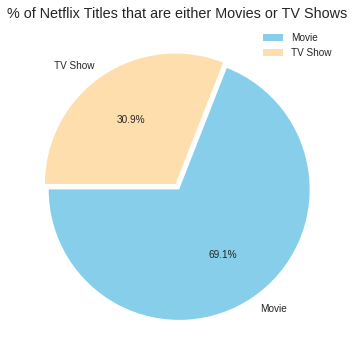

In [ ]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(df.type.value_counts(), explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


99.30797842663195


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


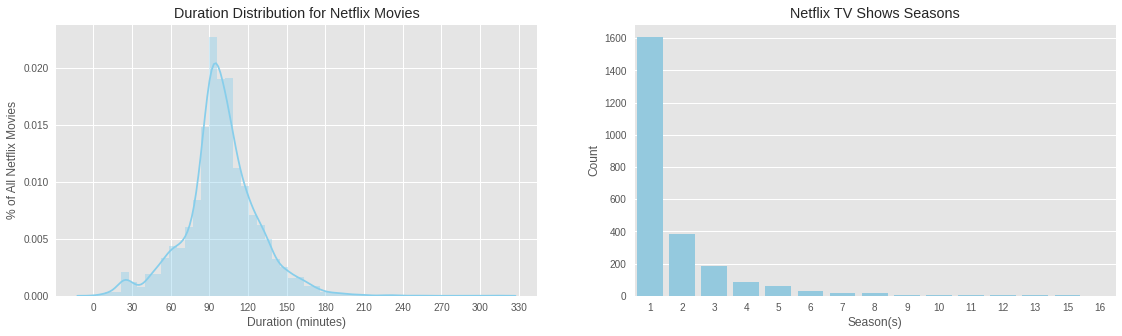

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(movies.duration, color='skyblue',ax=ax[0]);
print(np.mean(movies.duration))
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(tv_series.seasons, color='skyblue',ax=ax[1]);
#plt.axvline(np.median(tv_series.seasons),color='b', linestyle='--')
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()
#month_year_df = movies.groupby('date_added')['month_added'].value_counts().unstack().fillna(0).T




WE Observe the following from the above graphs :
1. In Movies Distribution on baisis of duration, the average seems to be close to 100, which prevalent size of lots of modern movies.
2.Most Tv series have atleast two seasons.
3. There are hardly any tv series with 9 or more seasons.
4. The plot is generally stretched after 3 seasons that coudl be possibly reason for the difference.

In [ ]:
#Countries list with most number of movies in Netflix

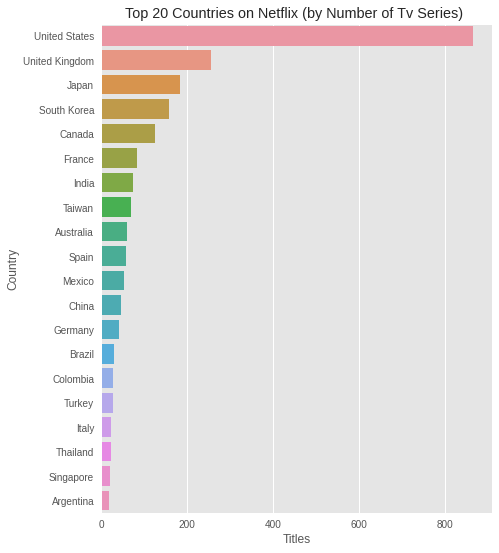

In [ ]:
filtered_countries = tv_series.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix (by Number of Tv Series) ')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

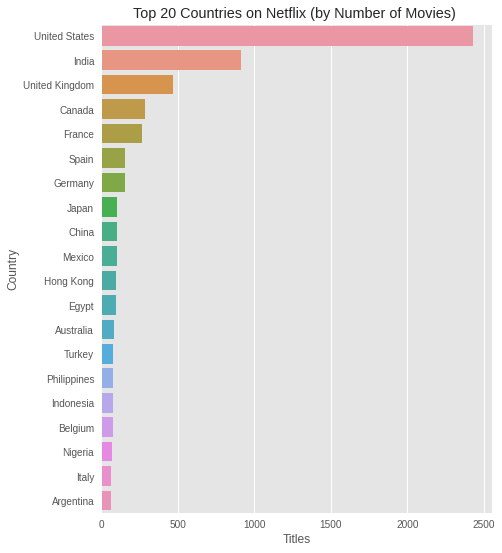

In [ ]:
filtered_countries_movies = movies.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries_movies = filtered_countries_movies[filtered_countries_movies != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries_movies, order=filtered_countries_movies.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix (by Number of Movies) ')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

So we could observe few things from the above graph:
1. US tops the list both for TV series count and Movies count.
2. India's film industry Bollywood is the largest in the world, could be observed by the count of Movies in propotion to the number of Tv series.


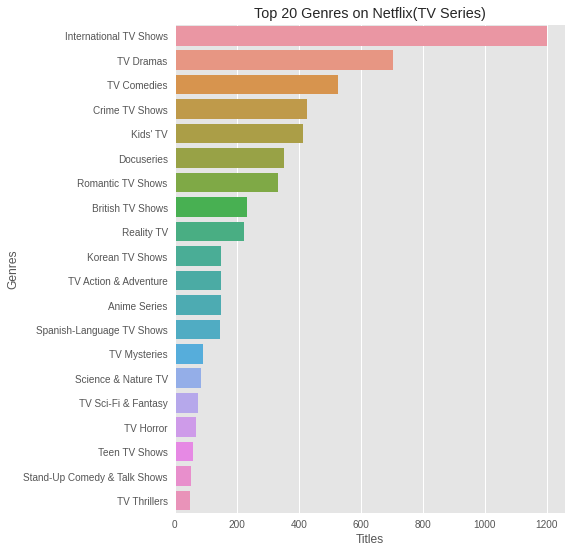

In [ ]:
#Lets Check the Popular Genres in Tv Series

filtered_genres = tv_series.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix(TV Series)')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


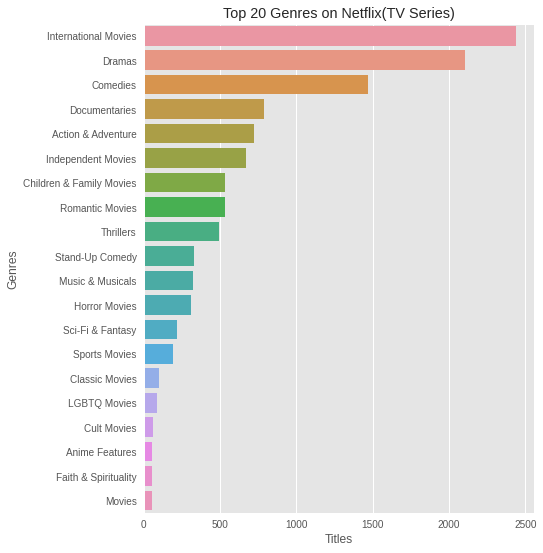

In [ ]:
#Lets Check the Popular Genres in Tv Series

filtered_genres = movies.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix(TV Series)')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


Both in Tv series and Movies we have following observations:
1. International Movies and International Tv series have the highest count, may be due to possibility of fundings from international organisations and plot entice world's viewers.
2. Drama , the all time favorite genre for any individual is second. Though its a vast category to represent , that may be a the reason for high count.

**Conclusions:**

Since lockown, a lot of people have started watching Netflix , and there's immense scope of growth both in content variety and content size.
The competitiors like Hulu, HBO , Prime , Disney and Hotstar are catching up quickly. 

**Future Scope of work :**
* Compartive study of growth in content size of different platforms.
* Revenue changes in size year wise.
* Viewers interests that could be reflected by IMDB ratings or number of viewers of any content.

References :

https://www.businessinsider.com/netflix-growth-comes-from-international-markets-2019-10?IR=T

https://www.kaggle.com/shivamb/netflix-shows

https://www.kaggle.com/sivaprksh/netflix-movies-and-tv-shows-eda